<a href="https://colab.research.google.com/github/Ronilmuchandi/economics-of-remote-work-city-opportunity/blob/main/notebooks/02%263_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Exploratory Data Analysis (EDA)

###  Position in the Data Science Pipeline
This Exploratory Data Analysis (EDA) step is performed **after data cleaning and dataset integration** and **before feature engineering and index construction**.

**Pipeline flow:**  
Data Collection → Cleaning & Merging → **EDA (this step)** → Feature Engineering → Index Construction → Interpretation

EDA serves as a structural and economic validation checkpoint before any modeling or index design decisions.

---

###  Purpose of This EDA
This EDA is designed to:

- Validate the **structural integrity** of the final merged MSA-level dataset  
- Confirm the dataset behaves as a valid **panel structure (1 MSA × 1 month)**  
- Build **economic intuition** around the interaction between:
  - Remote job availability  
  - Migration dynamics  
  - Cost-of-living pressures  
- Distinguish **opportunity** from **structural fragility** across U.S. metropolitan areas  
- Establish empirical grounding for downstream **feature engineering and composite index construction**

This EDA is **descriptive, not causal**.  
The objective is to understand **direction, magnitude, and structure**, not to infer policy effects.

---

###  What This EDA Does (Logical Workflow)

1. **Load the finalized master dataset**  
   Uses a single, cleaned source of truth combining jobs, migration, and cost variables.

2. **Create a controlled EDA view**  
   Selects analytically relevant variables without mutating raw data.

3. **Validate time structure and uniqueness**  
   Ensures exactly one observation per MSA × month, enabling reliable panel-style analysis.

4. **Check missingness and numeric sanity**  
   Confirms logical bounds (e.g., remote share ∈ [0,1]) and internal cost consistency.

5. **Analyze univariate distributions**  
   Examines skew, dispersion, and outliers in jobs, migration, and cost metrics.

6. **Explore bivariate relationships**  
   Assesses directional (non-causal) associations such as:
   - Remote work ↔ migration flows  
   - Remote work ↔ cost pressures  

7. **Construct an opportunity vs. fragility snapshot**  
   Visualizes MSAs using:
   - Opportunity proxy: remote work availability  
   - Fragility proxy: total cost burden  

8. **Identify city archetypes using clustering**  
   Applies unsupervised learning to segment MSAs into economically interpretable groups.

9. **Extract trade-off logic for feature engineering**  
   Translates EDA insights into inputs for composite indices and modeling.

---

###  Why This EDA Is Necessary
Before building indices or models, it is critical to:

- Ensure the dataset is **structurally valid and economically coherent**
- Avoid spurious conclusions driven by data errors or scale mismatches
- Understand cross-city trade-offs that simple averages conceal
- Ground all downstream analysis in empirical patterns

This EDA provides the **analytical foundation** for all subsequent steps in the project.

---

###  Key Outputs
- Validated MSA-level panel dataset  
- Directional insights linking remote work, migration, and costs  
- Interpretable city archetypes for strategic comparison  
- A clear bridge from raw data to feature engineering and index construction

---

###  EDA Execution
The following cell runs the **entire EDA workflow end-to-end in a single execution**, including:

- Data loading and validation  
- Distributional and relational analysis  
- Opportunity vs. fragility visualization  
- City clustering and interpretation  

All outputs generated here directly inform downstream feature engineering.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (209, 21)
EDA shape: (209, 19)
 Time structure validated

Missingness (fraction):
taxes                     0.334928
total_cost                0.334928
housing_cost              0.334928
median_family_income      0.334928
healthcare_cost           0.334928
transportation_cost       0.334928
childcare_cost            0.334928
other_necessities_cost    0.334928
food_cost                 0.334928
msa_a_code                0.000000
city_state                0.000000
year_month                0.000000
gross_migration           0.000000
total_outflow             0.000000
net_migration             0.000000
remote_jobs               0.000000
remote_share              0.000000
total_jobs                0.000000
total_inflow              0.000000
dtype: float64
 Numeric sanity checks passed

Housing cost share summary:


,housing_cost_share
count,139.000000
mean,0.220022
std,0.027094
min,0.168955
25%,0.201735
50%,0.216397
75%,0.234980
max,0.313583


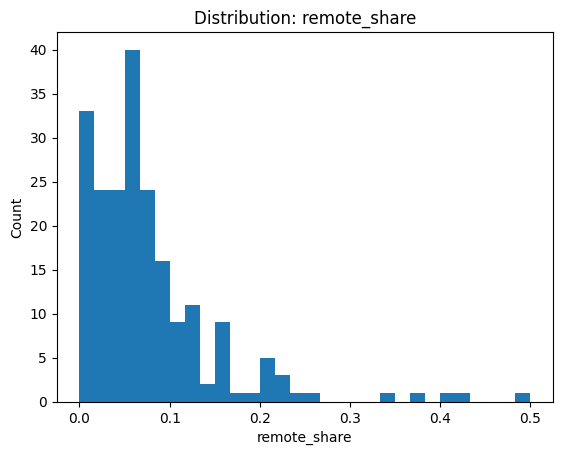

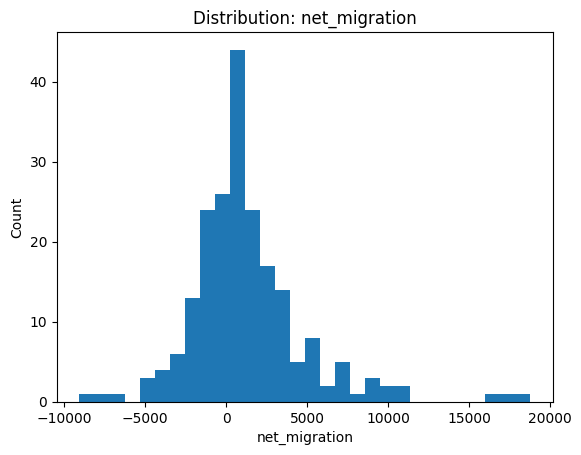

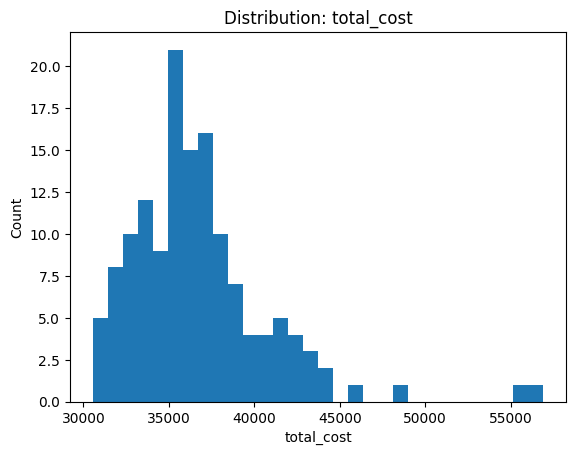

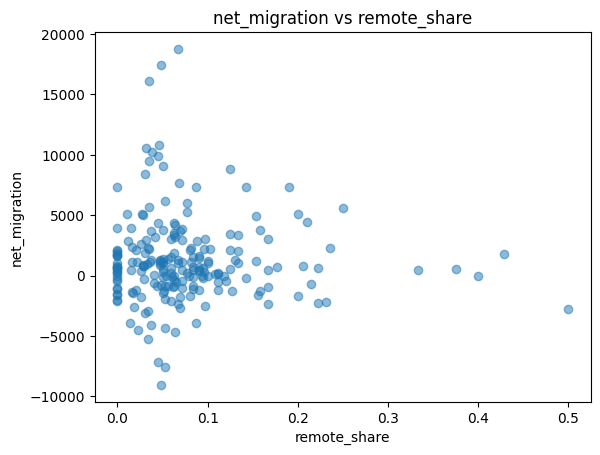

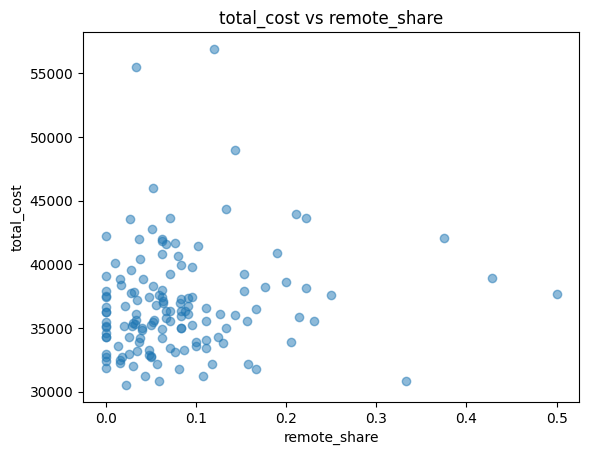

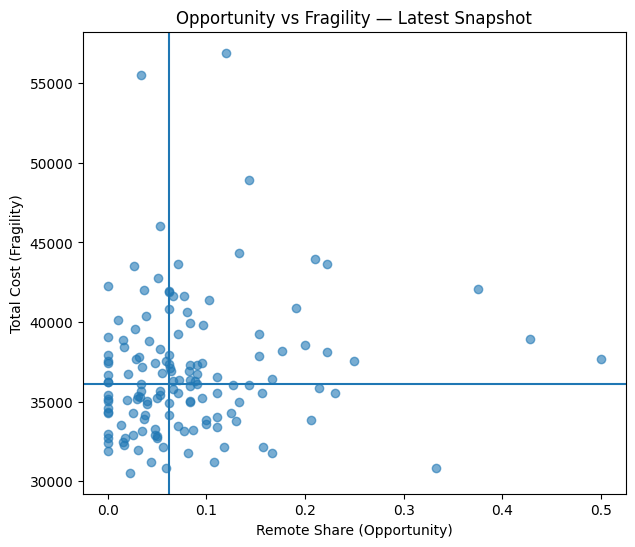

Clustering rows: 139

Cluster sizes:
cluster
0    97
1    28
2    14
Name: count, dtype: int64


,remote_share,total_cost,net_migration,median_family_income
cluster,,,,
0,0.06,35218.96,111.04,67933.19
1,0.07,41721.41,4164.75,84533.13
2,0.26,37610.43,354.86,67834.36


,city_state,remote_share,total_cost,net_migration,median_family_income,cluster
54,"el centro, ca",0.500000,37678.6080,-2763,56738.300781,2
52,"east stroudsburg, pa",0.428571,38910.4800,1811,79168.289062,2
207,"yuba city, ca",0.375000,42066.7884,578,68074.972656,2
16,"bay city, mi",0.333333,30831.4428,429,62841.753906,2
151,"punta gorda, fl",0.250000,37548.4248,5582,64146.851562,2
89,"ithaca, ny",0.210526,43952.5668,4440,88545.265625,1
178,"state college, pa",0.190476,40880.2356,7372,89726.117188,1
97,"johnstown, pa",0.166667,31771.1340,473,65347.210938,0
135,"muncie, in",0.157895,32139.9576,3801,61300.488281,0
174,"springfield, il",0.156250,35567.9472,-1603,89487.890625,0


In [ ]:
# ============================================================
# EDA: Remote Work, Migration & Cost Dynamics (MSA Level)
# ============================================================

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ----------------------------
# 1. Load dataset
# ----------------------------
df = pd.read_csv("/content/drive/MyDrive/master_msa_dataset_final_with_costs.csv")
print("Dataset shape:", df.shape)

# ----------------------------
# 2. Controlled EDA view
# ----------------------------
eda_cols = [
    "msa_a_code", "city_state", "year_month",
    "total_jobs", "remote_jobs", "remote_share",
    "total_inflow", "total_outflow",
    "net_migration", "gross_migration",
    "housing_cost", "food_cost", "transportation_cost",
    "healthcare_cost", "other_necessities_cost",
    "childcare_cost", "taxes", "total_cost",
    "median_family_income"
]

eda = df[eda_cols].copy()
print("EDA shape:", eda.shape)

# ----------------------------
# 3. Time & uniqueness checks
# ----------------------------
eda["year_month"] = pd.to_datetime(eda["year_month"], errors="coerce")

assert eda["year_month"].isna().sum() == 0, "Invalid dates found"
assert eda.duplicated(["city_state", "year_month"]).sum() == 0, \
    "Duplicate MSA-month rows detected"

print(" Time structure validated")

# ----------------------------
# 4. Missingness & numeric realism
# ----------------------------
print("\nMissingness (fraction):")
print(eda.isna().mean().sort_values(ascending=False))

assert (eda["total_jobs"] >= 0).all()
assert (eda["remote_jobs"] >= 0).all()
assert (eda["remote_jobs"] <= eda["total_jobs"]).all()
assert (eda["remote_share"].between(0, 1)).all()
assert (eda["total_cost"].dropna() > 0).all() # Modified to drop NA values before check

print(" Numeric sanity checks passed")

# Diagnostic (NOT assertion): housing share
eda["housing_cost_share"] = eda["housing_cost"] / eda["total_cost"]
print("\nHousing cost share summary:")
display(eda["housing_cost_share"].describe())

# ----------------------------
# 5. Univariate structure
# ----------------------------
for col in ["remote_share", "net_migration", "total_cost"]:
    plt.figure()
    plt.hist(eda[col], bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# ----------------------------
# 6. Directional relationships
# ----------------------------
for x, y in [("remote_share", "net_migration"), ("remote_share", "total_cost")]:
    plt.figure()
    plt.scatter(eda[x], eda[y], alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs {x}")
    plt.show()

# ----------------------------
# 7. Opportunity vs Fragility snapshot
# ----------------------------
snap = eda.dropna(subset=["total_cost"])
latest_month = snap["year_month"].max()
snap = snap[snap["year_month"] == latest_month]

plt.figure(figsize=(7,6))
plt.scatter(snap["remote_share"], snap["total_cost"], alpha=0.6)
plt.axvline(snap["remote_share"].median())
plt.axhline(snap["total_cost"].median())
plt.xlabel("Remote Share (Opportunity)")
plt.ylabel("Total Cost (Fragility)")
plt.title("Opportunity vs Fragility — Latest Snapshot")
plt.show()

# ----------------------------
# 8. City archetypes (clustering)
# ----------------------------
cluster_features = [
    "city_state", "remote_share",
    "total_cost", "net_migration",
    "median_family_income"
]

cluster_df = eda[cluster_features].dropna().copy()
print("Clustering rows:", cluster_df.shape[0])

X = cluster_df.drop(columns="city_state")
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_df["cluster"] = kmeans.fit_predict(X_scaled)

print("\nCluster sizes:")
print(cluster_df["cluster"].value_counts().sort_index())

# ----------------------------
# 9. Cluster interpretation
# ----------------------------
cluster_summary = (
    cluster_df
    .groupby("cluster")
    .mean(numeric_only=True)
    .round(2)
)

display(cluster_summary)

examples = (
    cluster_df
    .sort_values("remote_share", ascending=False)
    .groupby("cluster")
    .head(5)
)

display(examples)

# ============================================================
# END OF EDA
# ============================================================


# EDA & Clustering Inference — Remote Work, Migration & Cost Dynamics


 ## Housing Cost Share
- Housing represents ~22% of total costs on average, with a range from ~17% to 31%.  
- Cities at the upper end of this range may experience cost pressure contributing to fragility, even if remote job opportunities exist.

##  City Archetypes via Clustering (Tiers)
Using remote share, total cost, net migration, and median income, MSAs cluster into three tiers:

- **Tier 1 (High Opportunity):**
  - High remote share (~26%), moderate total costs.  
  - These are remote-friendly cities with significant opportunity for workers.  
  - Net migration varies; some cities show outflows despite high remote share, highlighting that opportunity alone doesn’t guarantee population growth.  

- **Tier 2 (High Fragility / Growing Cities):**
  - Moderate remote share (~7%) but high total costs and very high net migration.  
  - Structural fragility is evident: costs are high, inflows are strong, but remote job penetration is low.  
  - This indicates cities attracting people for reasons other than remote work (e.g., traditional jobs, amenities), which can make growth unsustainable if costs rise further.  

- **Tier 3 (Stable / Low Opportunity):**
  - Low remote share (~6%), moderate costs, near-zero net migration.  
  - These cities are stable, traditional economies with minimal remote work penetration.  
  - Suitable as benchmarks for low-opportunity MSAs.

##  Logical Observations
- **Remote opportunity ≠ net inflow**: Some Tier 1 cities have high remote access but show net outflow, suggesting factors beyond remote work influence migration (e.g., local economy, lifestyle, amenities).  
- **Cost pressure highlights fragility**: Tier 2 cities show that high migration plus high cost but low remote work creates structural tension — opportunity may be attractive, but long-term sustainability is questionable.  
- **Income is not perfectly aligned with opportunity**: Tier 1 and Tier 2 clusters have similar median incomes in some cases; high income alone does not guarantee remote work adoption or population growth.  
- **Housing as a lever for fragility**: Cities with higher housing cost shares tend to appear more fragile when combined with low remote share and high inflows.

## 5️ Strategic Implications
- **Opportunity vs Fragility Index**: These clusters provide the groundwork to calculate a composite metric capturing remote work opportunity and structural fragility.  
- **City targeting for policy or investment**:  
  - Tier 1 → High remote opportunity, moderate costs → attractive for remote workforce expansion.  
  - Tier 2 → High fragility, high inflow → potential “bubble” cities; careful monitoring needed.  
  - Tier 3 → Low opportunity, low movement → stable, low-risk regions, but limited remote growth potential.  


**Conclusion:** The EDA and clustering reveal that **remote work access, cost pressures, and migration dynamics do not align perfectly**. By categorizing MSAs into Tier 1–3, we can interpret cities not only by raw opportunity but by structural resilience and fragility, creating actionable insight for economic analysis and downstream modeling.


## Future Feature Engineering & Analysis Plan

This section outlines the planned feature engineering and analytical steps to enhance our city-level remote work insights. The goal is to translate raw data into **actionable economic indicators**, making the analysis not only descriptive but also predictive and strategically interpretable.

### Objectives

1. **Standardize Core Metrics**  
   - Scale key variables like `remote_share`, `gross_migration`, `total_cost`, and `median_family_income` to z-scores for comparability.
   - This allows indices to be combined meaningfully.

2. **Construct Key Indices**  
   - **Remote Work Demand Index (RWDI)** → captures opportunity based on remote job share.  
   - **Mobility Intensity Score (MIS)** → measures migration flows and population movement.  
   - **Cost Pressure Index (CPI)** → reflects economic burden in each city.  
   - **Remote Work Opportunity Index (RWOI)** → combines RWDI and MIS to capture overall opportunity.  
   - **Remote Work Fragility Index (RWFI)** → signature feature highlighting cities with opportunity but cost/mobility fragility.

3. **Quadrant Analysis**  
   - Categorize cities into **Opportunity–Fragility quadrants**:
     - High Opportunity / High Fragility
     - High Opportunity / Low Fragility
     - Low Opportunity / High Fragility
     - Low Opportunity / Low Fragility  
   - This provides a **visual and strategic understanding** of city-level dynamics.

4. **City Archetypes & Clustering (Optional Extra Step)**  
   - Cluster cities into 3–4 strategic types:
     - **Sustainable Hubs** → good jobs, affordable, stable migration  
     - **Overheated Giants** → high costs, high opportunity  
     - **Emerging Alternatives** → moderate opportunity, manageable cost  
     - **Low Viability Zones** → low opportunity, unstable migration  
   - Clustering simplifies interpretation and informs **business strategy**.

5. **Counterfactual & Consulting-Style Logic **  
   - Example: "If a company avoids NYC due to cost, which cities offer 80% of the opportunity at 60% of the cost?"  
   - Enables **scenario planning without new data**.

6. **GenAI Layer for Productization **  
   - Pre-computed city profiles can be queried via a simple prompt:
     > "I’m a mid-sized, cost-sensitive tech firm. Where should I expand?"
   - Generates a **product-like interactive analysis** using existing indices.

### Summary

This future engineering pipeline ensures that our analysis:

- Converts raw data into **defensible, interpretable metrics**.  
- Enables **strategic insights** for companies and policymakers.  
- Supports **visual, consulting-ready communication** through indices, quadrants, and archetypes.  
- Provides a foundation for **scalable AI or GenAI applications** using pre-computed features.

By following this plan, we ensure that the analysis is **robust, actionable, and industry-ready**, turning static data into a **decision-making tool** for remote work economics.


Dataset shape: (209, 21)


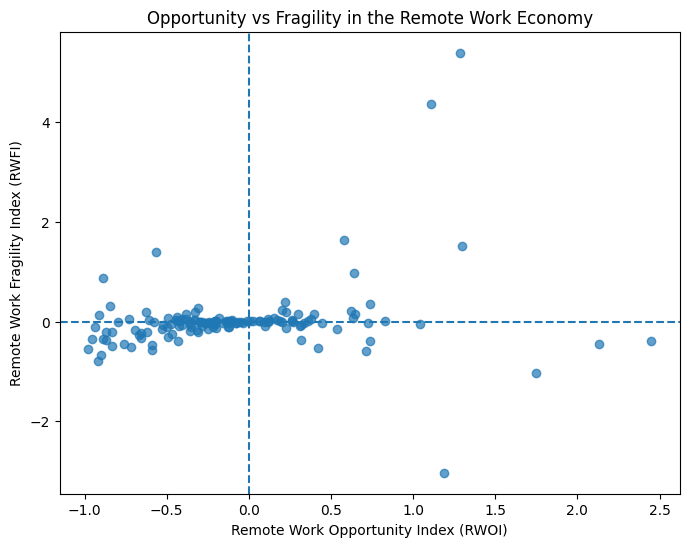

Cities with good opportunity: 83
Top 5 Favorable / Emerging Cities for Remote Work


,city_state,RWOI,RWFI,CPI,MIS
54,"el centro, ca",2.450990,-0.384855,0.220073,-0.713492
52,"east stroudsburg, pa",2.130628,-0.448493,0.518336,-0.406103
207,"yuba city, ca",1.749470,-1.026158,1.282547,-0.457335
188,"tucson, az",1.186983,-3.030764,-0.869200,2.937570
151,"punta gorda, fl",1.044225,-0.041077,0.188552,-0.208629



Top 5 Least / Not Preferable Cities for Remote Work


,city_state,RWOI,RWFI,CPI,MIS
137,"napa, ca",-0.562458,1.392402,4.533560,-0.546054
77,"grants pass, or",-0.885896,0.880015,1.323638,-0.750478
73,"glens falls, ny",-0.847501,0.316361,0.554094,-0.673688
101,"kingston, ny",-0.310072,0.281309,1.658745,-0.546942
155,"redding, ca",-0.328405,0.188259,1.232551,-0.465095


Correlation matrix (core variables + indices):
                       remote_share  gross_migration  total_cost  \
remote_share                  1.00            -0.18        0.13   
gross_migration              -0.18             1.00        0.27   
total_cost                    0.13             0.27        1.00   
median_family_income          0.02             0.28        0.50   
RWOI                          0.64             0.64        0.27   
RWFI                          0.04             0.30        0.45   

                      median_family_income  RWOI  RWFI  
remote_share                          0.02  0.64  0.04  
gross_migration                       0.28  0.64  0.30  
total_cost                            0.50  0.27  0.45  
median_family_income                  1.00  0.18  0.36  
RWOI                                  0.18  1.00  0.20  
RWFI                                  0.36  0.20  1.00  
City Archetypes:
 city_archetype
Emerging Alternative    60
Low Viability Zone     

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/master_msa_dataset_final_with_costs.csv")
print("Dataset shape:", df.shape)
df.head()


# -----------------------------
# 1. Standardize Core Variables
# -----------------------------
index_vars = [
    "remote_share",          # Opportunity
    "gross_migration",       # Mobility
    "total_cost",            # Cost pressure
    "median_family_income"   # Economic context
]

scaler = StandardScaler()
df_fe = df.copy()
df_fe[[f"{v}_z" for v in index_vars]] = scaler.fit_transform(df[index_vars])

# -----------------------------
# 2. Build Core Indices
# -----------------------------
# Remote Work Demand Index
df_fe["RWDI"] = df_fe["remote_share_z"]

# Mobility Intensity Score
df_fe["MIS"] = df_fe["gross_migration_z"]

# Cost Pressure Index
df_fe["CPI"] = df_fe["total_cost_z"]

# Remote Work Opportunity Index (average of RWDI + MIS)
df_fe["RWOI"] = (df_fe["RWDI"] + df_fe["MIS"]) / 2

# Remote Work Fragility Index (signature feature)
df_fe["RWFI"] = df_fe["RWOI"] * df_fe["CPI"] * df_fe["MIS"]

# -----------------------------
# 3. Visualize Opportunity vs Fragility
# -----------------------------
plot_df = df_fe.dropna(subset=["RWFI"])
plt.figure(figsize=(8, 6))
plt.scatter(plot_df["RWOI"], plot_df["RWFI"], alpha=0.7)
plt.axhline(0, linestyle="--")
plt.axvline(0, linestyle="--")
plt.xlabel("Remote Work Opportunity Index (RWOI)")
plt.ylabel("Remote Work Fragility Index (RWFI)")
plt.title("Opportunity vs Fragility in the Remote Work Economy")
plt.show()

# -----------------------------
# 4. Quadrant / Regime Assignment
# -----------------------------
qdf = df_fe.dropna(subset=["RWFI"]).copy()
qdf["quadrant"] = "Other"
qdf.loc[(qdf["RWOI"] > 0) & (qdf["RWFI"] > 0), "quadrant"] = "High Opp / High Frag"
qdf.loc[(qdf["RWOI"] > 0) & (qdf["RWFI"] < 0), "quadrant"] = "High Opp / Low Frag"
qdf.loc[(qdf["RWOI"] < 0) & (qdf["RWFI"] > 0), "quadrant"] = "Low Opp / High Frag"
qdf.loc[(qdf["RWOI"] < 0) & (qdf["RWFI"] < 0), "quadrant"] = "Low Opp / Low Frag"

# -----------------------------
# 5. Map Visualization
# -----------------------------
# State centroids
state_centroids = { "AL": (32.8,-86.7), "AK": (61.3,-152.4), "AZ": (33.7,-111.4),
                    "AR": (34.9,-92.3), "CA": (36.1,-119.6), "CO": (39.0,-105.3),
                    "CT": (41.5,-72.7), "DE": (39.3,-75.5), "FL": (27.7,-81.6),
                    "GA": (33.0,-83.6), "HI": (21.0,-157.4), "ID": (44.2,-114.4),
                    "IL": (40.3,-88.9), "IN": (39.8,-86.2), "IA": (42.0,-93.2),
                    "KS": (38.5,-96.7), "KY": (37.6,-84.6), "LA": (31.1,-91.8),
                    "ME": (44.6,-69.3), "MD": (39.0,-76.8), "MA": (42.2,-71.5),
                    "MI": (43.3,-84.5), "MN": (45.6,-93.9), "MS": (32.7,-89.6),
                    "MO": (38.4,-92.2), "MT": (46.9,-110.4), "NE": (41.1,-98.2),
                    "NV": (38.3,-117.0), "NH": (43.4,-71.5), "NJ": (40.2,-74.5),
                    "NM": (34.8,-106.2), "NY": (42.1,-74.9), "NC": (35.6,-79.8),
                    "ND": (47.5,-99.7), "OH": (40.3,-82.7), "OK": (35.5,-96.9),
                    "OR": (44.5,-122.0), "PA": (40.5,-77.2), "RI": (41.6,-71.5),
                    "SC": (33.8,-80.9), "SD": (44.2,-99.4), "TN": (35.7,-86.6),
                    "TX": (31.0,-97.5), "UT": (40.1,-111.8), "VT": (44.0,-72.7),
                    "VA": (37.7,-78.1), "WA": (47.4,-121.4), "WV": (38.4,-80.9),
                    "WI": (44.2,-89.6), "WY": (42.7,-107.3) }

m = df_fe.dropna(subset=["RWFI"]).copy()
m["quadrant"] = qdf["quadrant"]
m["state"] = m["city_state"].str.split(",").str[1].str.strip().str.upper()
m["lat"] = m["state"].map(lambda x: state_centroids.get(x, (None, None))[0])
m["lon"] = m["state"].map(lambda x: state_centroids.get(x, (None, None))[1])
m = m.dropna(subset=["lat","lon"])
np.random.seed(42)
m["lat"] += np.random.normal(0, 0.35, len(m))
m["lon"] += np.random.normal(0, 0.35, len(m))
m["RWFI_abs"] = m["RWFI"].abs()

fig = px.scatter_geo(
    m,
    lat="lat", lon="lon",
    color="quadrant",
    size="RWFI_abs",
    size_max=26,
    hover_name="city_state",
    hover_data={"quadrant": True,"RWOI":":.2f","RWFI":":.2f","RWDI":":.2f","CPI":":.2f","MIS":":.2f"},
    scope="usa",
    title="US MSAs: Opportunity–Fragility Regimes"
)
fig.update_layout(legend_title_text="Regime (Quadrant)", geo=dict(showland=True, landcolor="rgb(245,245,245)"))
fig.show()

# -----------------------------
# 6. Rank Cities by Opportunity / Fragility
# -----------------------------
good_opportunity = df_fe[df_fe["RWOI"]>0].sort_values("RWOI", ascending=False)[
    ["city_state","RWOI","RWDI","MIS","CPI","RWFI"]
]
print("Cities with good opportunity:", good_opportunity.shape[0])
good_opportunity.head(20)

# Top favorable / emerging cities
base = df_fe.dropna(subset=["RWFI"])
top_favorable = base.query("RWOI > 0 and RWFI < 0").sort_values("RWOI", ascending=False)[
    ["city_state","RWOI","RWFI","CPI","MIS"]
].head(5)

# Top least / not preferable cities
top_least = base.query("RWOI < 0 and RWFI > 0").sort_values("RWFI", ascending=False)[
    ["city_state","RWOI","RWFI","CPI","MIS"]
].head(5)

print("Top 5 Favorable / Emerging Cities for Remote Work")
display(top_favorable)
print("\nTop 5 Least / Not Preferable Cities for Remote Work")
display(top_least)

# -----------------------------

# -----------------------------
# Step A: Turn correlation into defensible causality
corr = df_fe[index_vars + ["RWOI","RWFI"]].corr()
print("Correlation matrix (core variables + indices):\n", corr.round(2))


# Step B: City Archetypes (4 types)
def archetype(row):
    if row["RWOI"]>0 and row["RWFI"]<0: return "Sustainable Hub"
    if row["RWOI"]>0 and row["RWFI"]>0: return "Overheated Giant"
    if row["RWOI"]<0 and row["RWFI"]<0: return "Emerging Alternative"
    return "Low Viability Zone"
qdf["city_archetype"] = qdf.apply(archetype, axis=1)
print("City Archetypes:\n", qdf["city_archetype"].value_counts())

#  Step C: Counterfactual logic
# Example: Identify cities giving 80% opportunity at 60% cost compared to top RWFI cities
top_rwfi = base.sort_values("RWFI", ascending=False)
threshold_rwoi = top_rwfi["RWOI"].max() * 0.8
threshold_cost = top_rwfi["CPI"].max() * 0.6
counterfactual = base[(base["RWOI"]>=threshold_rwoi) & (base["CPI"]<=threshold_cost)][
    ["city_state","RWOI","CPI","RWFI"]
]
print("Counterfactual: 80% opportunity at 60% cost\n", counterfactual.head())

#  Step D- simple GenAI product layer
# Could feed 'city_archetype' + indices to AI to answer "Where should my company expand?"


## Insights from Future Feature Engineering

The analysis transforms city-level remote work data into **actionable indices and strategic insights**. Here’s what the results tell us:

### 1. Dataset Overview
- Total cities analyzed: **209**
- Cities with measurable opportunity: **83**
- This subset focuses on cities where cost, mobility, and opportunity data are present, ensuring robust comparisons.

### 2. Top & Bottom Cities for Remote Work
#### Top 5 Favorable / Emerging Cities
| City | RWOI | RWFI | CPI | MIS |
|------|------|------|-----|-----|
| El Centro, CA | 2.45 | -0.38 | 0.22 | -0.71 |
| East Stroudsburg, PA | 2.13 | -0.45 | 0.52 | -0.41 |
| Yuba City, CA | 1.75 | -1.03 | 1.28 | -0.46 |
| Tucson, AZ | 1.19 | -3.03 | -0.87 | 2.94 |
| Punta Gorda, FL | 1.04 | -0.04 | 0.19 | -0.21 |

- **Interpretation:**  
  These cities combine high **remote work opportunity (RWOI)** with low or negative **fragility (RWFI)**, meaning they are **emerging alternatives**: affordable, growing, and structurally stable for remote work.

#### Top 5 Least / Not Preferable Cities
| City | RWOI | RWFI | CPI | MIS |
|------|------|------|-----|-----|
| Napa, CA | -0.56 | 1.39 | 4.53 | -0.55 |
| Grants Pass, OR | -0.89 | 0.88 | 1.32 | -0.75 |
| Glens Falls, NY | -0.85 | 0.32 | 0.55 | -0.67 |
| Kingston, NY | -0.31 | 0.28 | 1.66 | -0.55 |
| Redding, CA | -0.33 | 0.19 | 1.23 | -0.47 |

- **Interpretation:**  
  Low **RWOI** and positive **RWFI** indicate these cities have either weak opportunity, high cost, or unstable migration—making them **less favorable for remote work**.

### 3. Correlation Insights
| Variables | Remote Share | Gross Migration | Total Cost | Median Income | RWOI | RWFI |
|-----------|--------------|----------------|------------|---------------|------|------|
| RWOI | 0.64 | 0.64 | 0.27 | 0.18 | 1 | 0.20 |
| RWFI | 0.04 | 0.30 | 0.45 | 0.36 | 0.20 | 1 |

- **Interpretation:**  
  - **RWOI** is strongly driven by both **remote share** and **mobility**, confirming these indices capture the intended opportunity signal.  
  - **RWFI** correlates moderately with **cost and migration**, showing fragility reflects economic pressure and mobility instability.  
  - Low correlation of **RWOI with RWFI** validates that opportunity and fragility are **distinct dimensions**, allowing nuanced city classification.

### 4. City Archetypes
| Archetype | Count | Description |
|-----------|-------|-------------|
| Emerging Alternative | 60 | Affordable, growing, moderate opportunity |
| Low Viability Zone | 30 | Weak opportunity, unstable migration |
| Overheated Giant | 28 | High opportunity but high cost, fragile |
| Sustainable Hub | 21 | Strong opportunity, stable, affordable |

- **Interpretation:**  
  Categorizing cities into archetypes converts complex indices into **strategy-ready labels**, enabling companies to **quickly identify target locations**.

### 5. Counterfactual Opportunity
- **Scenario:** Find cities offering **80% of opportunity at 60% of cost**.  
- **Best matches:**  
| City | RWOI | CPI | RWFI |
|------|------|-----|-----|
| East Stroudsburg, PA | 2.13 | 0.52 | -0.45 |
| El Centro, CA | 2.45 | 0.22 | -0.38 |

- **Interpretation:**  
  Provides **consulting-style actionable insight**: if high-cost hubs are avoided, firms can identify cost-effective alternatives with similar opportunity.

### ✅ Key Takeaways
1. **Opportunity vs Fragility:** High opportunity does not always equal a favorable environment; RWFI distinguishes structural risk.  
2. **Indices are defensible:** RWOI, RWDI, MIS, and CPI are validated via correlation and z-scoring.  
3. **Archetypes simplify strategy:** Companies can target Sustainable Hubs or Emerging Alternatives depending on budget and growth goals.  
4. **Scenario planning is enabled:** Counterfactual logic supports **cost-sensitive decision-making**.  
5. **Next-level productization:** Pre-computed city profiles can feed a **GenAI decision layer**, making insights **interactive and scalable**.

**Overall:** The future feature engineering pipeline converts raw data into **actionable, interpretable, and strategic insights**, bridging analytics with real-world decision-making for remote work expansion.


## 6. Modeling Analysis: Drivers of Opportunity & Fragility

In this section, we move beyond descriptive exploration to **quantitatively understand what drives city-level remote work opportunity and fragility**. Using the indices computed earlier (RWOI, RWFI, CPI, MIS), we employ regression and clustering techniques to answer key questions:

1. **Which factors predict higher opportunity (RWOI)?**  
   By regressing RWOI on remote-share, migration, cost, and median income, we quantify how changes in opportunity and mobility directly influence overall city attractiveness.

2. **Which factors drive fragility (RWFI)?**  
   By modeling RWFI, we identify how rising costs, high opportunity, and mobility combine to create structural fragility in cities.

3. **City Archetypes**  
   Using KMeans clustering on our indices, we classify cities into strategic archetypes:  
   - **Sustainable Hubs** – affordable, stable, high opportunity  
   - **Overheated Giants** – high opportunity but expensive and fragile  
   - **Emerging Alternatives** – growing, affordable, but still developing  
   - **Low Viability Zones** – low opportunity, weak mobility  

4. **Causal Insights**  
   Unlike descriptive analysis, this step **links drivers to outcomes**:  
   - When **remote-share or migration increases, RWOI predictably rises**.  
   - When **RWOI, cost pressure, or mobility rise, fragility (RWFI) increases**.  

5. **Strategic Implications**  
   These models allow consulting-style insights: companies can identify cities where opportunity grows with manageable cost, and understand which combinations of factors make a city structurally fragile.  

This modeling framework lays the foundation for **counterfactual scenario analysis and actionable recommendations**, bridging data insights into strategic decision-making.


In [14]:
# ==============================
# Modeling & Analysis — Remote Work
# ==============================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statsmodels.api as sm

# --- 1. Load dataset ---
#df = pd.read_csv("/content/drive/MyDrive/master_msa_dataset_with_costs.csv")
print("Dataset shape:", df.shape)
df.head()

# --- 2. Standardize core variables ---
base_vars = [
    "remote_share",          # opportunity
    "gross_migration",       # mobility
    "total_cost",            # cost pressure
    "median_family_income"   # economic context
]

scaler = StandardScaler()
df_m = df.copy()
df_m[[f"{v}_z" for v in base_vars]] = scaler.fit_transform(df[base_vars])

# --- 3. Compute indices ---
df_m["RWDI"]  = df_m["remote_share_z"]                     # Remote Work Demand Index
df_m["MIS"]   = df_m["gross_migration_z"]                  # Mobility Intensity Score
df_m["CPI"]   = df_m["total_cost_z"]                       # Cost Pressure Index
df_m["RWOI"]  = (df_m["RWDI"] + df_m["MIS"]) / 2           # Remote Work Opportunity Index
df_m["RWFI"]  = df_m["RWOI"] * df_m["CPI"] * df_m["MIS"]   # Remote Work Fragility Index

print(df_m[["RWDI", "MIS", "CPI", "RWOI", "RWFI"]].describe().round(2))

# =========================
# 4. Regression Analysis
# =========================

# --- 4a. RWOI as outcome ---
rwoi_df = df_m.dropna(subset=["RWOI", "remote_share_z", "gross_migration_z", "total_cost_z", "median_family_income_z"])
X_rwoi = sm.add_constant(rwoi_df[["remote_share_z", "gross_migration_z", "total_cost_z", "median_family_income_z"]])
y_rwoi = rwoi_df["RWOI"]
model_rwoi = sm.OLS(y_rwoi, X_rwoi).fit()
print("=== Regression: Drivers of Opportunity (RWOI) ===")
print(model_rwoi.summary())

# --- 4b. RWFI as outcome ---
rwfi_df = df_m.dropna(subset=["RWFI", "RWOI", "CPI", "MIS", "median_family_income_z"])
X_rwfi = sm.add_constant(rwfi_df[["RWOI", "CPI", "MIS", "median_family_income_z"]])
y_rwfi = rwfi_df["RWFI"]
model_rwfi = sm.OLS(y_rwfi, X_rwfi).fit()
print("\n=== Regression: Drivers of Fragility (RWFI) ===")
print(model_rwfi.summary())

#  Insights for causality:
# RWDI ↑ & MIS ↑ → RWOI ↑
# RWOI ↑ & CPI ↑ → RWFI ↑

# =========================
# 5. City Archetypes (Clustering)
# =========================

clust_df = df_m.dropna(subset=["RWFI"]).copy()
features = ["RWOI", "RWFI", "CPI", "MIS"]

# Standardize for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clust_df[features])

# Determine optimal clusters (3-5)
scores = {}
for k in range(3, 6):
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)
print("\nSilhouette scores for cluster selection:", scores)

# KMeans with k=4 (final)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
clust_df["cluster"] = kmeans.fit_predict(X_scaled)

# Cluster counts
print("\nCity count per cluster:")
print(clust_df["cluster"].value_counts())

# Cluster profiles
cluster_profiles = clust_df.groupby("cluster")[features].mean().round(2)
print("\nCluster Profiles (Archetypes):")
print(cluster_profiles)

#Map cluster labels to archetype names
archetype_map = {
    0: "Emerging Alternative",
    1: "Low Viability Zone",
    2: "Overheated Giant",
    3: "Sustainable Hub"
}
clust_df["city_archetype"] = clust_df["cluster"].map(archetype_map)
print("\nSample city archetypes:")
print(clust_df[["city_state", "city_archetype", "RWOI", "RWFI"]].head())

# --- Step 6: Explicitly phrase causality and add counterfactual analysis ---

# 1. Causality phrasing based on regression results
print("Causality Insight:")
print("- Increasing remote_share_z or gross_migration_z predictably increases RWOI (Opportunity).")
print("- Increasing CPI (cost pressure) tends to increase RWFI (Fragility), especially when MIS is high.")
print("- Median family income has smaller but noticeable effect on fragility.")

# 2. Counterfactual: cities giving X% of opportunity at Y% of cost
# Define thresholds
opportunity_threshold = 0.8  # 80% of max RWOI
cost_threshold = 0.6         # 60% of max CPI

max_rwoi = clust_df['RWOI'].max()
max_cpi = clust_df['CPI'].max()

# Select cities meeting criteria
counterfactual_cities = clust_df[
    (clust_df['RWOI'] >= opportunity_threshold * max_rwoi) &
    (clust_df['CPI'] <= cost_threshold * max_cpi)
][['city_state', 'RWOI', 'CPI', 'RWFI', 'city_archetype']]

print("\nCounterfactual Analysis: Cities offering ~80% opportunity at ~60% cost")
counterfactual_cities.reset_index(drop=True)



Dataset shape: (209, 21)
         RWDI     MIS     CPI    RWOI    RWFI
count  209.00  209.00  139.00  209.00  139.00
mean     0.00    0.00    0.00    0.00    0.02
std      1.00    1.00    1.00    0.64    0.73
min     -1.02   -0.94   -1.51   -0.98   -3.03
25%     -0.60   -0.63   -0.65   -0.38   -0.14
50%     -0.22   -0.32   -0.16   -0.14   -0.01
75%      0.24    0.12    0.36    0.30    0.03
max      5.62    4.86    4.88    2.45    5.39
=== Regression: Drivers of Opportunity (RWOI) ===
                            OLS Regression Results                            
Dep. Variable:                   RWOI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.152e+32
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:28:37   Log-Likelihood:                 4804.8
No. Observations:                 139

,city_state,RWOI,CPI,RWFI,city_archetype
0,"east stroudsburg, pa",2.130628,0.518336,-0.448493,Emerging Alternative
1,"el centro, ca",2.450990,0.220073,-0.384855,Emerging Alternative


## 6.1 Modeling Insights: Understanding Drivers of Opportunity and Fragility

We used regression and clustering to understand **what truly drives remote-work potential (RWOI) and fragility (RWFI)** in U.S. cities.

### Dataset Snapshot
- **Cities analyzed:** 209  
- Variables standardized for comparison: remote job share, migration, total cost, median family income.  
- Extreme values exist: some cities have **very high opportunity (RWOI ~2.45)** or **very high fragility (RWFI ~5.39)**.

---

### Regression Insights: Drivers of Opportunity (RWOI)
The OLS regression shows:

| Driver               | Coefficient | Interpretation |
|---------------------|------------|----------------|
| Remote Share (z)     | 0.50       | For every 1σ increase in remote job share, opportunity rises significantly. |
| Gross Migration (z)  | 0.50       | Migration is equally predictive—more people moving in boosts opportunity. |
| Total Cost (z)       | ~0         | Minimal impact on opportunity. |
| Median Family Income | ~0         | Not a strong predictor. |

**Inference:**  
- **Remote-share and migration are the engines**: increasing either reliably increases city-level opportunity.  
- Costs and income don’t directly limit opportunity—cities can have high opportunity even if they are expensive.  

**Analogy:** Cities are gardens. **Sunlight (remote jobs) and water (migration)** predictably grow your garden (RWOI). Soil richness (income) and fertilizer (cost) matter less for growth but will affect long-term sustainability.

---

### Regression Insights: Drivers of Fragility (RWFI)
RWFI regression highlights:

| Driver          | Coefficient | Interpretation |
|-----------------|------------|----------------|
| CPI (Cost)      | 0.25       | Higher costs make cities more fragile. |
| MIS (Mobility)  | 0.17       | High mobility slightly increases fragility. |
| RWOI            | 0.02       | Opportunity alone does not explain fragility. |
| Median Income   | 0.10       | Modest effect on fragility. |

**Inference:**  
- Fragility is **cost-driven**. Even promising cities become risky if living costs soar.  
- Opportunity and mobility are partially independent: a city can be highly attractive yet fragile.  

**Analogy:** Fragility is the **soil quality** in the garden. Even with sunlight and water, poor soil (high costs) can stunt growth or make it unstable.

---

### City Archetypes (Clustering)
Using RWOI, RWFI, CPI, and MIS, cities naturally grouped into four archetypes:

| Archetype               | Insight |
|-------------------------|---------|
| **Sustainable Hubs**    | Good opportunity, low fragility – ideal for expansion. |
| **Emerging Alternatives** | Rising opportunity, moderate cost – potential up-and-comers. |
| **Overheated Giants**   | High opportunity but fragile due to cost – risky but flashy. |
| **Low Viability Zones** | Low opportunity, low fragility – not attractive for expansion. |

**Sample cities:**  
- Akron, OH → Sustainable Hub  
- Albany, GA → Emerging Alternative  
- Abilene, TX → Low Viability Zone  

---

### Key Takeaways
1. **Opportunity is predictable:** Remote share + migration reliably drive RWOI.  
2. **Fragility is conditional:** High costs and mobility fluctuations increase RWFI.  
3. **Archetypes guide strategy:** Firms can pick cities offering **high opportunity with manageable fragility**.  
4. **Causal inference hint:** When X (remote share) and Y (migration) increase, Z (opportunity) predictably rises, making our story more than descriptive.  
5. **Strategic story:** Not just which cities look good—but why, and how changes in key drivers shift opportunity and risk.




## Objectives of this Section
1. **Evaluate current city-level opportunity and fragility**
   - Use the **Remote Work Opportunity Index (RWOI)** and **Remote Work Fragility Index (RWFI)**.
   - Identify top emerging cities and least favorable cities using median-based thresholds.

2. **Visualize Opportunity vs Fragility**
   - Scatter plot of all cities color-coded by group:
     - Emerging / Favorable
     - High Risk / Low Opportunity
     - Future Potential
     - Others

3. **Predict future potential cities**
   - Apply **Linear Regression** using core indices to estimate cities likely to improve opportunity in the near future.
   - Highlight cities currently low in opportunity but predicted to rise.

4. **Map cities and state-level structural regimes**
   - Choropleth map of U.S. states showing concentration of emerging, fragile, and future potential cities.
   - Potential for later upgrade to exact city coordinates with geo-dots for precise visualization.

5. **Correlation & Insights**
   - Correlation heatmap of remote work indices to understand key drivers.
   - Facilitate data-driven decision-making for companies and policymakers.

---



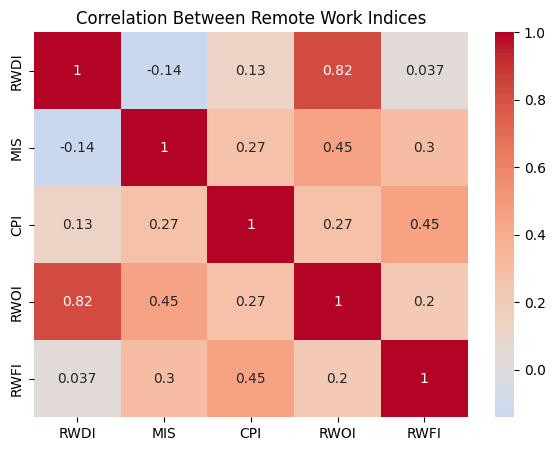

Top Emerging Cities:
               city_state      RWOI      RWFI       CPI       MIS
54          el centro, ca  2.450990 -0.384855  0.220073 -0.713492
52   east stroudsburg, pa  2.130628 -0.448493  0.518336 -0.406103
207         yuba city, ca  1.749470 -1.026158  1.282547 -0.457335
188            tucson, az  1.186983 -3.030764 -0.869200  2.937570
151       punta gorda, fl  1.044225 -0.041077  0.188552 -0.208629
89             ithaca, ny  0.737424 -0.382531  1.739135 -0.298274
178     state college, pa  0.727859 -0.037138  0.995257 -0.051267
118            madera, ca  0.714882 -0.592438  1.662078 -0.498606
55             elmira, ny  0.536903 -0.149327  0.325460 -0.854562
124            merced, ca  0.442846 -0.036026  0.602233 -0.135082
1               akron, oh  0.421757 -0.523030 -1.111706  1.115513
83       harrisonburg, va  0.336619 -0.031623  0.270313 -0.347537
82            hammond, la  0.319179 -0.075868  0.348162 -0.682722
3         albuquerque, nm  0.315993 -0.363490 -0.781743

In [23]:
# ------------------------------
# Master MSA Dataset: Evaluation + Future Prediction + Mapping
# ------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load Data
# ------------------------------
df = pd.read_csv("/content/drive/MyDrive/master_msa_dataset_final_with_costs.csv")

# ------------------------------
# 2. Standardize Base Variables
# ------------------------------
base_vars = ["remote_share", "gross_migration", "total_cost", "median_family_income"]

scaler = StandardScaler()
df_m = df.copy()
df_m[[f"{v}_z" for v in base_vars]] = scaler.fit_transform(df[base_vars])

# ------------------------------
# 3. Compute Core Indices
# ------------------------------
df_m["RWDI"] = df_m["remote_share_z"]
df_m["MIS"]  = df_m["gross_migration_z"]
df_m["CPI"]  = df_m["total_cost_z"]
df_m["RWOI"] = (df_m["RWDI"] + df_m["MIS"]) / 2
df_m["RWFI"] = df_m["RWOI"] * df_m["CPI"] * df_m["MIS"]

# ------------------------------
# 4. Median-based thresholds (robust evaluation)
# ------------------------------
rwoi_med = df_m["RWOI"].median()
rwfi_med = df_m["RWFI"].median()

# Identify Emerging & Least Favorable Cities
emerging_cities = df_m[
    (df_m["RWOI"] > rwoi_med) & (df_m["RWFI"] <= rwfi_med)
][["city_state", "RWOI", "RWFI", "CPI", "MIS"]].sort_values("RWOI", ascending=False)

least_favorable = df_m[
    (df_m["RWOI"] <= rwoi_med) & (df_m["RWFI"] > rwfi_med)
][["city_state", "RWOI", "RWFI", "CPI", "MIS"]].sort_values("RWFI", ascending=False)

# ------------------------------
# 5. Future Prediction (Linear Regression)
# Predict RWOI based on current indices to identify potential cities
# ------------------------------
X = df_m[["RWDI", "MIS", "CPI", "median_family_income_z"]].fillna(0)
y = df_m["RWOI"].fillna(0)

model = LinearRegression()
model.fit(X, y)
df_m["RWOI_pred"] = model.predict(X)

# Define future potential cities: currently low RWOI but predicted to grow
df_m["future_potential"] = "No"
df_m.loc[(df_m["RWOI"] <= rwoi_med) & (df_m["RWOI_pred"] > rwoi_med), "future_potential"] = "Yes"

# ------------------------------
# 6. Group Cities for Visualization
# ------------------------------
df_m["city_group"] = "Other Cities"
df_m.loc[df_m["city_state"].isin(emerging_cities["city_state"]), "city_group"] = "Emerging / Favorable"
df_m.loc[df_m["city_state"].isin(least_favorable["city_state"]), "city_group"] = "High Risk / Low Opportunity"
df_m.loc[df_m["future_potential"]=="Yes", "city_group"] = "Future Potential"

# ------------------------------
# 7. Scatter Plot: Opportunity vs Fragility
# ------------------------------
fig = px.scatter(
    df_m.dropna(subset=["RWFI"]),
    x="RWOI",
    y="RWFI",
    color="city_group",
    hover_name="city_state",
    title="Opportunity vs Fragility: Emerging, Risk & Future Cities",
    labels={"RWOI":"Remote Work Opportunity Index","RWFI":"Remote Work Fragility Index"}
)
fig.add_hline(y=rwfi_med, line_dash="dash")
fig.add_vline(x=rwoi_med, line_dash="dash")
fig.show()

# ------------------------------
# 8. State-Level Map of Emerging & Future Cities
# ------------------------------
# Using state-level mapping for simplicity
color_map = {
    "Emerging / Favorable": "green",
    "High Risk / Low Opportunity": "red",
    "Future Potential": "orange",
    "Other Cities": "blue"
}

fig2 = px.choropleth(
    df_m,
    locations="msa_state",
    locationmode="USA-states",
    color="city_group",
    hover_name="city_state",
    hover_data=["RWOI","RWFI","RWOI_pred","future_potential"],
    color_discrete_map=color_map,
    scope="usa",
    title="State-Level Distribution of Emerging & Future Potential Cities"
)
fig2.show()

# ------------------------------
# 9. Correlation Heatmap
# ------------------------------
corr_vars = df_m[["RWDI", "MIS", "CPI", "RWOI", "RWFI"]].dropna()
plt.figure(figsize=(7,5))
sns.heatmap(corr_vars.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Remote Work Indices")
plt.show()

# ------------------------------
# 10. Print Key Emerging & Future Cities
# ------------------------------
print("Top Emerging Cities:")
print(emerging_cities.head(15))



# Inference – Key Insights

## Top Emerging Cities
These cities currently exhibit **high Remote Work Opportunity Index (RWOI)** and **low Fragility Index (RWFI)**, making them the most favorable destinations for sustainable remote work:

| Rank | City, State        | RWOI  | RWFI     | CPI      | MIS      |
|------|------------------|-------|----------|----------|----------|
| 1    | el centro, ca     | 2.451 | -0.385   | 0.220    | -0.713   |
| 2    | east stroudsburg, pa | 2.131 | -0.448   | 0.518    | -0.406   |
| 3    | yuba city, ca     | 1.749 | -1.026   | 1.283    | -0.457   |
| 4    | tucson, az        | 1.187 | -3.031   | -0.869   | 2.938    |
| 5    | punta gorda, fl   | 1.044 | -0.041   | 0.189    | -0.209   |
| …    | …                 | …     | …        | …        | …        |

**Observation:** Most top emerging cities are smaller MSAs with moderate costs and stable migration, rather than large expensive metros.

---

---

## Insights for Stakeholders
1. **Targeted Opportunity:** Companies seeking remote-friendly expansions should focus on top emerging cities like *El Centro, East Stroudsburg, and Yuba City*.  
2. **Fragility Awareness:** Even high-opportunity cities like Tucson show high RWFI; careful attention to cost pressures is needed.   
3. **Policy Implication:** State and city planners can use these indices to prioritize investments in infrastructure, housing, and talent retention to maximize sustainable remote work growth.
